<a href="https://colab.research.google.com/github/eth212/QMIND/blob/master/graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving colab.xlsx to colab.xlsx


In [3]:
import tensorflow
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib
from matplotlib import pyplot as plt
#! pip install tensorflow-gpu==2.0.0 

In [0]:
def get_counts(series):
  X = series.tolist()
  count = Counter(np.array(X))
  tuple_list = count.most_common()
  return tuple_list

In [0]:
buffer = pd.read_excel("colab.xlsx")
df = pd.DataFrame(buffer)
df

In [99]:
#df = df.drop(columns = [ 'Datasource', 'SerialNumber', 'Unnamed: 0','TransactionType', 'Axles'  ])
df["Salesprice"] = df[df["Salesprice"] > 1000]["Salesprice"]
df["HP"] = df[df["HP"] > 0]["HP"]
df["Salesprice"] = df[df["Salesprice"] < 300000]["Salesprice"]
df["Year"] = df[df["Year"] > 2000]["Year"]
df["Adjusted_Salesprice"] = df[df["Adjusted_Salesprice"] > 1646]["Adjusted_Salesprice"]
df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Mileage"] = df[df["Mileage"] > 0]["Mileage"]
df = df[~df['Mileage'].isnull()]
df = df[~df['HP'].isnull()]
df = df[~df['Spd'].isnull()]
df = df[~df['Salesprice'].isnull()]
df = df[~df['SaleDate'].isnull()]
df = df[~df['Adjusted_Salesprice'].isnull()]

#checking Nan Values
df["Salesprice"].isna().sum()

0

In [0]:
#alternate df
df_alt = pd.DataFrame()
df_alt = df


In [0]:
#switch back

df = df_alt
df.columns
df

In [0]:
model_list = get_counts(df["Model"])
num_models = 2
list_of_models_to_use = model_list[1:num_models] #the number after 0 in  [0:20] dictates the number of models to use (popular first)
models = []
for i in range(len(list_of_models_to_use)):
  models.append(list_of_models_to_use[i][0])
df = df[df["Model"].isin(models)]
df

In [96]:
model_list = get_counts(df["Model"])
models = ["CH613"]
df = df[df["Model"].isin(models)]
df

,Classification,Year,Make,Model,Salesprice,SaleDate,Location,AuctionCompany,Mileage,Engine,HP,Suspension,Sleeper,Trans,Spd,mNotes,Adjusted_Salesprice


In [0]:
#keeping a make consistent 
make_list = get_counts(df["Make"])
num_makes = 1
list_of_makes_to_use = make_list[0:num_models] #the number after 0 in  [0:20] dictates the number of models to use (popular first)
makes = []
for i in range(num_makes):
  makes.append(list_of_makes_to_use[i][0])
df = df[df["Make"].isin(makes)]
df

In [0]:
#keeping years within range
years = [2006]
df = df[df["Year"].isin(years)]

df

In [0]:
#analysis
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [82]:
df["Adjusted_Salesprice"].describe()

count      393.000000
mean     33195.904994
std      12295.408897
min       9340.764910
25%      23302.271363
50%      33422.204218
75%      42206.841265
max      78421.417026
Name: Adjusted_Salesprice, dtype: float64

In [84]:
df["Mileage"].describe()

count    3.930000e+02
mean     7.352970e+05
std      1.879367e+05
min      9.100000e+04
25%      6.220000e+05
50%      7.430000e+05
75%      8.470000e+05
max      1.280532e+06
Name: Mileage, dtype: float64

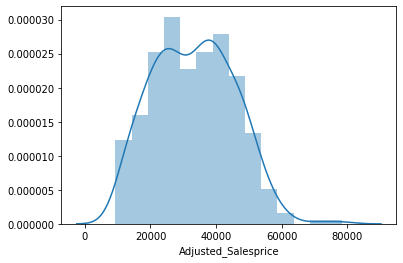

In [85]:
df = df[~df['Adjusted_Salesprice'].isnull()]
sns.distplot(df["Adjusted_Salesprice"])


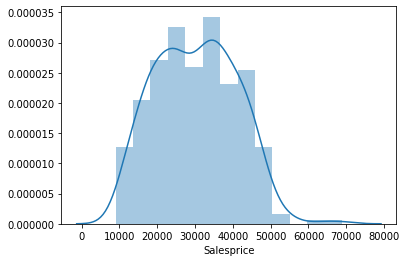

In [86]:
df = df[~df['Salesprice'].isnull()]
sns.distplot(df["Salesprice"])

In [87]:
print("Skewness: %f" % df['Salesprice'].skew())
print("Kurtosis: %f" % df['Salesprice'].kurt())

Skewness: 0.188000
Kurtosis: -0.485789


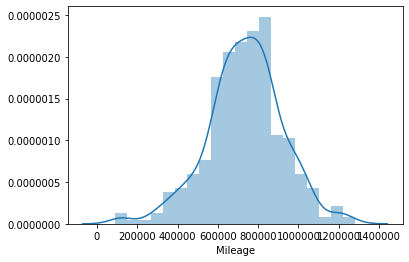

In [88]:
sns.distplot(df["Mileage"])

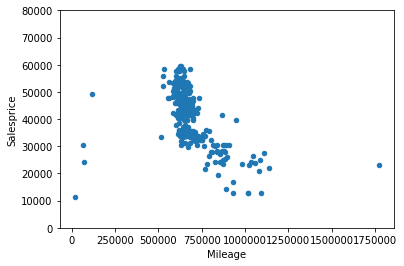

In [105]:
#scatter plot grlivarea/saleprice
var = 'Mileage'
data = pd.concat([df['Salesprice'], df[var]], axis=1)
data.plot.scatter(x=var, y='Salesprice', ylim=(0,80000));

In [50]:
df["Spd"].describe()

count    388.000000
mean      10.373711
std        1.002338
min        9.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       13.000000
Name: Spd, dtype: float64

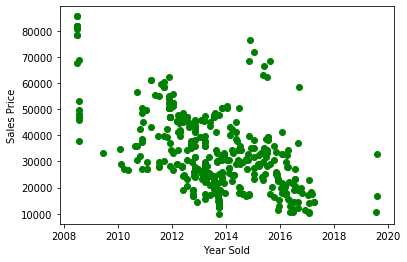

In [52]:
#manual
sold = df["SaleDate"].tolist()
year_sold = [x.to_pydatetime() for x in sold]
prices = df["Salesprice"].tolist()
plt.xlabel("Year Sold")
plt.ylabel("Sales Price")
plt.scatter(year_sold, prices, c='g')

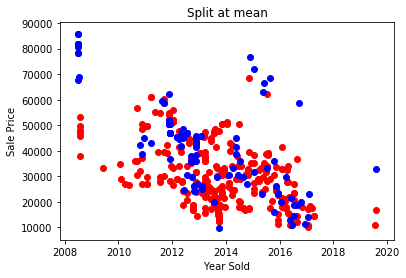

In [53]:
x_big = []
y_big = []
x_sm = []
y_sm = []
for i in range(len(df)):
  if df["HP"].iloc[i] > 475:
    x_big.append(df["SaleDate"].iloc[i].to_pydatetime())
    y_big.append(df["Salesprice"].iloc[i])
  else:
    x_sm.append(df["SaleDate"].iloc[i].to_pydatetime())
    y_sm.append(df["Salesprice"].iloc[i])
plt.xlabel("Year Sold")
plt.ylabel("Sale Price")
plt.title("Split at mean")
plt.scatter(x_sm, y_sm, c="r")
plt.scatter(x_big, y_big, c="b")
#blue points have higher Speeds
#reds dont

In [112]:
df

,Classification,Year,Make,Model,Salesprice,SaleDate,Location,AuctionCompany,Mileage,Engine,HP,Suspension,Sleeper,Trans,Spd,mNotes,Adjusted_Salesprice
187,Conventional,2007.0,INTERNATIONAL,9400I EAGLE,45032.0,2012-12-20,CHARLOTTE NC,NaN,602000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Pro Sleeper,10 Speed Transmission,10.0,"2007 INTERNATIONAL 9400i Eagle Conventional, 5...",50621.172485
190,Conventional,2007.0,INTERNATIONAL,9400I EAGLE,45032.0,2012-12-20,CHARLOTTE NC,NaN,530000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Pro Sleeper,10 Speed Transmission,10.0,"2007 INTERNATIONAL 9400i Eagle Conventional, 5...",50621.172485
191,Conventional,2007.0,INTERNATIONAL,9400I EAGLE,45032.0,2012-12-20,CHARLOTTE NC,NaN,590000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Pro Sleeper,10 Speed Transmission,10.0,"2007 INTERNATIONAL 9400i Eagle Conventional, 5...",50621.172485
298,Conventional,2004.0,INTERNATIONAL,9400I EAGLE,22532.0,2009-12-10,CHARLOTTE NC,NaN,645000.0,Cummins ISX,400.0,Air Ride,51 INCH HI-RISE PRO,10 Speed,10.0,2004 INTERNATIONAL Model 9400i Eagle Conventio...,26637.262845
299,Conventional,2004.0,INTERNATIONAL,9400I EAGLE,22532.0,2009-12-10,CHARLOTTE NC,NaN,662000.0,Cummins ISX,400.0,Air Ride,51 INCH HI-RISE PRO,10 Speed,10.0,2004 INTERNATIONAL Model 9400i Eagle Conventio...,26637.262845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147554,Conventional,2006.0,INTERNATIONAL,9400I EAGLE,49082.0,2017-02-16,BURGETTSTOWN PA,NaN,115000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Sleeper,10 Speed Transmission,10.0,"2006 INTERNATIONAL 9400i Eagle Conventional, 5...",50759.900721
147890,Conventional,2007.0,INTERNATIONAL,9400I EAGLE,31532.0,2017-02-02,BRIGHTON CO,NaN,656000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Sleeper,10 Speed Transmission,10.0,"2007 INTERNATIONAL 9400i Eagle Conventional, 5...",32609.942332
150579,Conventional,2007.0,INTERNATIONAL,9400I EAGLE,16682.0,2017-04-13,TUNICA MS,NaN,983000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Pro Sleeper,10 Speed Transmission,10.0,"2007 INTERNATIONAL 9400i Eagle Conventional, 5...",17252.285234
150580,Conventional,2007.0,INTERNATIONAL,9400I EAGLE,15782.0,2017-04-13,TUNICA MS,NaN,854000.0,Cummins ISX,400.0,Air Ride,51 Inch Hi-Rise Pro Sleeper,10 Speed Transmission,10.0,"2007 INTERNATIONAL 9400i Eagle Conventional, 5...",16321.518137


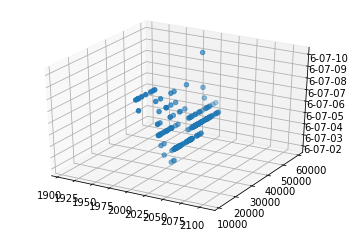

In [140]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
Y = df["Salesprice"].tolist()
X = df["Year"].tolist()
Z = df["SaleDate"].tolist()
Z = [inst.year for inst in Z]
ax.scatter(X,Y,Z)

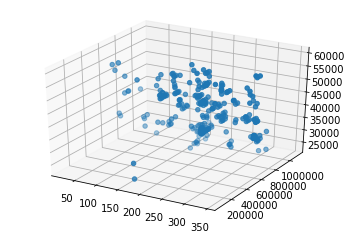

In [187]:
#synthetic
#Y is sales price

x = df["SaleDate"].tolist()
x = [inst.year for inst in x]
count = Counter(np.array(Z))
tuple_list = count.most_common()
#print(tuple_list)
#2011
new_x = []
new_y = []
new_z = []
year_m = tuple_list[0][0]
for i in range(len(Z)):
  if(x[i] == year_m or x[i] == year_m + 1 or x[i] == year_m - 1):
    new_x.append(df["SaleDate"].iloc[i].dayofyear)
    new_z.append(df["Salesprice"].iloc[i])
    new_y.append(df["Mileage"].iloc[i])

#plt.scatter(new_x, new_y, c="r")
title = "Model " + str(df["Model"].iloc[0]) + " In Years " + str(year_m - 1) + " to " + str(year_m + 1)
#plt.title(title)
#plt.xlabel("Day of Year")
#plt.ylabel("Sales Price")
ax2 = plt.axes(projection='3d')
ax2.set_autoscalez_on(True)
ax2.scatter3D(new_x, new_y, new_z)

In [0]:
def one_hot_encode(series_original, df_destination):
  new_df = pd.get_dummies(series_original)
  df_destination = pd.concat([df_destination,new_df], axis=1)
  return df_destination

In [0]:
def get_data(df, list_of_cols):
  data = []
  for j in range(len(df)):
    temp = []   
    for i in range(len(list_of_cols)):
      val = df[list_of_cols[i]].iloc[j]  
      temp.append(val)
    data.append(temp)
  return data



In [0]:
def seperate(y_index, data_set):
  X = []
  Y = []
  for i in range(len(data_set)):
    cols = len(data_set[i])
    Y.append(data_set[i][y_index])
    X.append(data_set[i][(y_index + 1):cols])
  return Y,X



In [0]:
#analysis
df.corr()
df

In [0]:
#dropping years under 1990
def drop_y(df):
  anymore = True
  indices = []
  while(anymore == True):
    index = df["Year"].idxmin()
    value = df["Year"].iloc[index]
    if(value > 1990):
      anymore = False
      break
    else:
      indices.append(index)
      df = df.drop(index)
  return 
    

In [0]:
 df["Year"] = df[df["Year"] > 1990]["Year"]
df["Year"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
154838    NaN
154839    NaN
154840    NaN
154841    NaN
154842    NaN
Name: Year, Length: 154843, dtype: object

In [0]:
df["Year"].iloc[0] > 1990
df["Year"] = df[df["Year"] > 1990]["Year"]
df["HP"] = df[df["HP"] < 3000]["HP"]


In [0]:
df.dropna()

,Classification,Datasource,SerialNumber,Year,Make,Model,Salesprice,SaleDate,Location,AuctionCompany,Mileage,Engine,HP,Suspension,Sleeper,Trans,Spd,Axles,TransactionType,mNotes


In [0]:
df["HP"]

0           NaN
1           NaN
2         550.0
3           NaN
4         500.0
          ...  
154838    300.0
154839    300.0
154840    300.0
154841    300.0
154842    300.0
Name: HP, Length: 154843, dtype: float64

model is :  CH613 

engine is :  E7-350 

vehicle made in :  2001.0 

locations :   [('FORT WORTH, TX', 36), ('JACKSON, MS', 12), ('HOUSTON, TX', 11)] 

collected data
seperated data


0

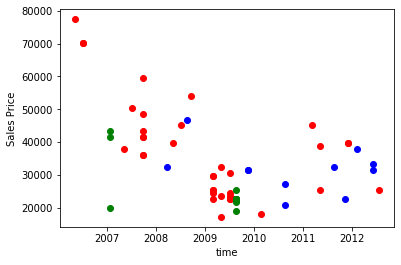

In [0]:
def graph_sp_time(model_number=0, engine_number=1, year_number=0, num_locations = 3):
  df = df_alt
  df = df.drop( columns = ['Classification', 'Datasource', 'SerialNumber', 'Make', 'AuctionCompany', 'Mileage','HP', 'Suspension', 'Sleeper', 'Trans', 'Spd', 'Axles','TransactionType', 'mNotes'])
  df = df.dropna()
  model_list = get_counts(df["Model"])
  print("model is : ",model_list[model_number][0], "\n")

  #refining the models
  unpopulated_cols2 = []
  garbage2 = model_list[model_number]
  for i in range(len(garbage2)):
    unpopulated_cols2.append(garbage2[i])
  df = df[df["Model"].isin(unpopulated_cols2)]
  
  #getting rid of not relevent data
  engine_list = get_counts(df["Engine"])
  garbage = []
  garbage = engine_list[engine_number]
  print("engine is : ", engine_list[0][0], "\n")
  #converting list of tuples into list
  unpopulated_cols = []
  for k in range(len(garbage)):
    unpopulated_cols.append(garbage[k])
  df = df[df["Engine"].isin(unpopulated_cols)]

  #refining the years
  year_list = get_counts(df["Year"])
  unpopulated_cols3 = []
  garbage3 = year_list[year_number]
  print("vehicle made in : ", year_list[0][0], "\n")
  for i in range(len(garbage3)):
    unpopulated_cols3.append(garbage3[i])
    df = df[df["Year"].isin(unpopulated_cols3)]
  
  #location
  location_list = get_counts(df["Location"])
  unpopulated_cols4 = []
  garbage4 = location_list[0:num_locations]
  print("locations :  ", garbage4, "\n")
  for i in range(num_locations):
    unpopulated_cols4.append(garbage4[i][0])
  df = df[df["Location"].isin(unpopulated_cols4)]
  df = one_hot_encode(df["Location"],df)
  
  #refining dataframe
  df = df.drop(columns = ["Year", "Engine", "Model"])
  
  #converting to list
  data_set = get_data(df, list(df.columns))
  print("collected data")

  #seperating the data
  Y, X = seperate(0,data_set)
  print("seperated data")
  
  #pregraphing
  list_of_datetimes1 = []
  y1 = []
  list_of_datetimes2 = []
  y2 = []
  list_of_datetimes3 = []
  y3 = []
  for i in range(len(X)):
    if df[df.columns[3]].iloc[i] == 1:
      list_of_datetimes1.append(df["SaleDate"].iloc[i].date())
      y1.append(Y[i])
    elif df[df.columns[4]].iloc[i] == 1:
      list_of_datetimes2.append(df["SaleDate"].iloc[i].date())
      y2.append(Y[i])
    elif df[df.columns[5]].iloc[i] == 1:
      list_of_datetimes3.append(df["SaleDate"].iloc[i].date())
      y3.append(Y[i])
    
  dates1 = matplotlib.dates.date2num(list_of_datetimes1)
  dates2 = matplotlib.dates.date2num(list_of_datetimes2)
  dates3 = matplotlib.dates.date2num(list_of_datetimes3)
  plt.ylabel("Sales Price")
  plt.xlabel("time")
  plt.plot_date(dates1, y1, c="r")
  plt.plot_date(dates2, y2, c="b")
  plt.plot_date(dates3,y3, c="g")
  return 0
  


graph_sp_time(model_number=2)

In [0]:
'''note:
I could make a function make many different graphs and come up with a trend line for each
return the trend line and compare the slope of all of them to find the actual pattern
heads up: the first points are very important (hype factor) would need to consider

672

ValueError: ignored

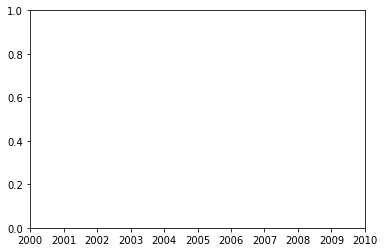

In [0]:
list_of_datetimes = []
for i in range(len(frame)):
   list_of_datetimes.append(frame["SaleDate"].iloc[i].date())
dates = matplotlib.dates.date2num(list_of_datetimes)
plt.plot_date(dates, y_var, c="r")

In [0]:
#pre graphing
det_12 = []
det_14 = []
mer = []
for i in range(len(X)):
  if X[i][1] == 1:
    det_12.append(X[i][0])
    det_14.append(None)
    mer.append(None)
  elif X[i][2] == 1:
    det_14.append(X[i][0])
    det_12.append(None)
    mer.append(None)
  else:
    mer.append(X[i][0])
    det_14.append(None)
    det_12.append(None)

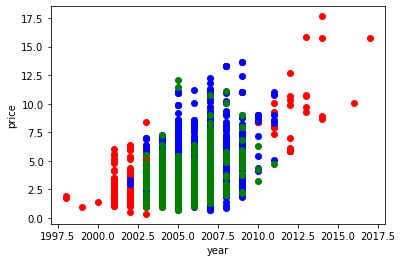

In [0]:
#graphing begins here 
plt.xlabel("year")
plt.ylabel("price")
plt.scatter(det_12, Y, c="r")
plt.scatter(det_14, Y, c="b")
plt.scatter(mer, Y, c="g")